<h1>情感分析</h1>

In [6]:
from snownlp import SnowNLP
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [7]:
comments_list = list(item[3:] for item in csv.reader(open("scene_comment_.csv",encoding="utf-8")))

In [ ]:
with open("scene_.csv",encoding="utf-8") as f:
    reader = csv.reader(f)
    scener = list(reader)[1:]
def filter(item):
    return item[:2]
scene = list(map(filter,scener))
place_dict = dict(scene)

In [9]:
def _(item,place_id):
    if item[1] == place_id:
        return item[0]
    else:
        return None

def filter():
    result = dict()
    for id in place_dict.keys():
        lister = list()
        for item in comments_list:
            if _(item,id):
                lister.append(_(item,id))
        result[id] = lister
    return result

comments_dict = filter()

In [21]:
score_dict_full = dict()
for place_id,comments in comments_dict.items():
    score_list = np.array([SnowNLP(comment).sentiments for comment in comments])
    score_dict_full[place_id] = score_list
score_dict_full
print([list(i) for i in score_dict_full.values()][:6])

[[0.9166721652791673, 0.9371925326353401, 0.0015438207491070832, 0.9447687573729628, 0.4083577759666699, 0.15918795309257328, 0.9663931655547634], [0.004866850254093613, 0.999811935244139, 0.9994137454238285, 0.7693323758569741, 0.9900489672658269], [0.06700668007762967, 0.008917229226088619, 0.795740941340607, 0.9999890619018289, 2.06161695998075e-05, 0.9926727186442266, 0.9991757310853927, 0.7077619057760383, 0.9960311640778186, 0.2584022583897384, 0.9956812455475197, 0.9696003269216783, 0.9998452682056892, 1.881065847531005e-08], [1.0], [0.36914922813126827, 0.8739743678100903, 0.8091961549712534, 0.9593519981305475, 0.9255656933244579, 0.46226732044083585, 0.1908371180180617, 0.46689166576766095, 0.9988530731357175, 0.08606702661953336, 0.9996924545515151, 0.9162269844542372, 0.14806699451214644, 0.9909127812912594, 0.9030747866126712, 0.9405719520581898], [0.9852364321725035, 0.19202680778862358, 0.9561111922470853, 0.08756094366260081, 0.972655498981648, 0.9960808815069612, 0.074

In [22]:
score_dict_av = dict()
for place_id,scores in score_dict_full.items():
    average = scores.mean() 
    score_dict_av[place_dict[place_id]] = average
score_dict_av


{'文殊院': 0.6191594529500835,
 '武侯祠': 0.7526947748089724,
 '锦里': 0.6279175118696081,
 '杜甫草堂': 1.0,
 '洛带古镇': 0.6900437249893404,
 '黄龙溪古镇': 0.546588398910224,
 '人民公园': 0.678823979968801,
 '西岭雪山': 0.5404903176383286,
 '四川科技馆': 0.8246951997132681,
 '欢乐谷': 0.720303797478655,
 '九峰山': 0.3897961999980765,
 '平乐古镇': 0.5358857419724362,
 '宽窄巷子': 0.6036338330110329,
 '青城山': 0.7594011357589069,
 '安仁古镇': 0.44047989012206756,
 '春熙路': 0.9042253633851889,
 '赵公山': 0.7002947811783916,
 '东郊记忆': 0.6259727072299661}

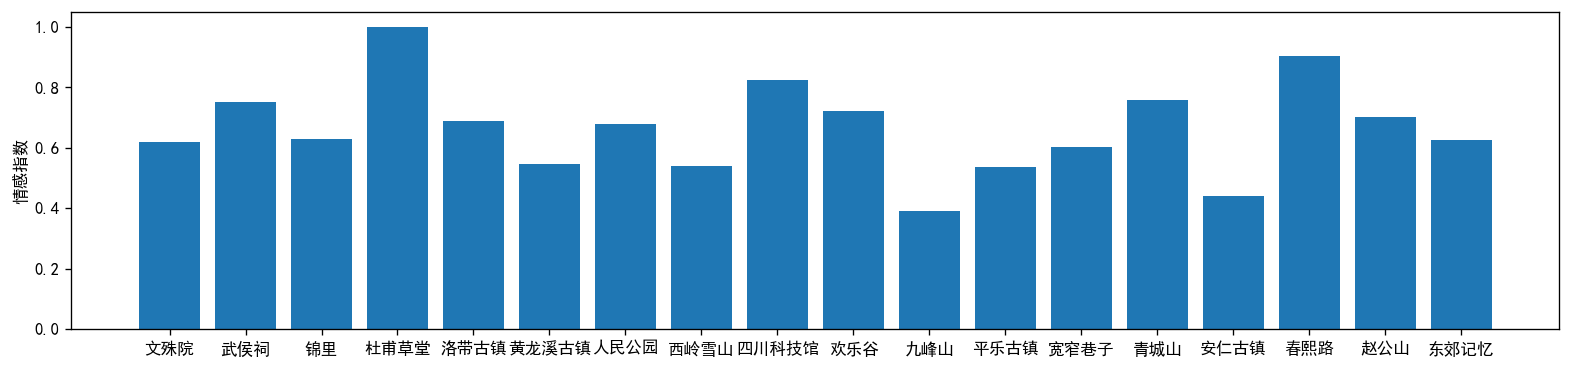

In [23]:
x = score_dict_av.keys()
y = score_dict_av.values()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(16, 3.5), dpi=120)

plt.bar(x,y)
plt.ylabel("情感指数")

plt.show()

In [24]:
print(list(x))
print(list(y))

['文殊院', '武侯祠', '锦里', '杜甫草堂', '洛带古镇', '黄龙溪古镇', '人民公园', '西岭雪山', '四川科技馆', '欢乐谷', '九峰山', '平乐古镇', '宽窄巷子', '青城山', '安仁古镇', '春熙路', '赵公山', '东郊记忆']
[0.6191594529500835, 0.7526947748089724, 0.6279175118696081, 1.0, 0.6900437249893404, 0.546588398910224, 0.678823979968801, 0.5404903176383286, 0.8246951997132681, 0.720303797478655, 0.3897961999980765, 0.5358857419724362, 0.6036338330110329, 0.7594011357589069, 0.44047989012206756, 0.9042253633851889, 0.7002947811783916, 0.6259727072299661]


In [25]:
n = list(zip(list(x),list(y)))
n = sorted(n)
n

[('东郊记忆', 0.6259727072299661),
 ('九峰山', 0.3897961999980765),
 ('人民公园', 0.678823979968801),
 ('四川科技馆', 0.8246951997132681),
 ('安仁古镇', 0.44047989012206756),
 ('宽窄巷子', 0.6036338330110329),
 ('平乐古镇', 0.5358857419724362),
 ('文殊院', 0.6191594529500835),
 ('春熙路', 0.9042253633851889),
 ('杜甫草堂', 1.0),
 ('欢乐谷', 0.720303797478655),
 ('武侯祠', 0.7526947748089724),
 ('洛带古镇', 0.6900437249893404),
 ('西岭雪山', 0.5404903176383286),
 ('赵公山', 0.7002947811783916),
 ('锦里', 0.6279175118696081),
 ('青城山', 0.7594011357589069),
 ('黄龙溪古镇', 0.546588398910224)]

In [26]:
print([emo[1] for emo in n])

[0.6259727072299661, 0.3897961999980765, 0.678823979968801, 0.8246951997132681, 0.44047989012206756, 0.6036338330110329, 0.5358857419724362, 0.6191594529500835, 0.9042253633851889, 1.0, 0.720303797478655, 0.7526947748089724, 0.6900437249893404, 0.5404903176383286, 0.7002947811783916, 0.6279175118696081, 0.7594011357589069, 0.546588398910224]


<h1> 宽窄巷子单独 </h1>
<hr>

In [50]:
comments_emotion = score_dict_full['87950']
comments_emotion
print([float('{:.6f}'.format(score)) for score in comments_emotion])

[0.999996, 0.999703, 0.996159, 0.999944, 0.955027, 0.993158, 0.81024, 0.045905, 0.010244, 0.999785, 0.054837, 0.084553, 0.113311, 0.999782, 0.827674, 2.8e-05, 0.001127, 0.0, 0.954489, 0.000662, 0.000907, 0.851303, 0.996801, 1.0, 0.835556, 0.97872, 0.0, 0.5562, 0.147963, 0.061394, 0.99996, 1.0, 0.860211, 0.991591, 0.999954]


In [54]:
ava = np.array(comments_emotion).mean()

In [58]:
print(np.var(comments_emotion))
print(np.std(comments_emotion))

0.19560973155635747
0.44227788951784314
